In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Store current working directory: curr_wd
curr_wd = os.getcwd()

# Store file name: file_rosters
file_rosters = 'Pittsburgh_Pirates_Roster_2015_2018.csv'

# Load file as a Pandas Dataframe: df_rosters_pirates
df_rosters_pirates = pd.read_csv(curr_wd + '/data_sources/' + file_rosters, parse_dates=['Date Of Birth'])

# Review the shape (rows, columns) of df_rosters_pirates
print(df_rosters_pirates.shape)

(196, 9)


Before we begin to think about the supervised learning models we can apply to this data, let's perform Exploratory data analysis (EDA) in order to understand the structure of the data. 


We'll begin by exploring the dataset numerically, leveraging the **.head()**, **.info()** and **.describe()** methods availabile with the **Pandas** libraries.

In [41]:
# Preview the dataset by viewing the first 5 rows of data.
print(df_rosters_pirates.head())

   Year Position   #               Player Height  Weight Throws   Bats  \
0  2015  Pitcher  59     Antonio Bastardo   5-11     202   Left  Right   
1  2015  Pitcher  55          Joe Blanton   6-03     225  Right  Right   
2  2015  Pitcher  34         A.J. Burnett   6-04     230  Right  Right   
3  2015  Pitcher  37  Arquimedes Caminero   6-04     245  Right  Right   
4  2015  Pitcher  45          Gerrit Cole   6-04     225  Right  Right   

  Date Of Birth  
0    1985-09-21  
1    1980-12-11  
2    1977-01-03  
3    1987-06-16  
4    1990-09-08  


In [42]:
# Review the completeness and data types within this dataset.
print(df_rosters_pirates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 9 columns):
Year             196 non-null int64
Position         196 non-null object
#                196 non-null object
Player           196 non-null object
Height           196 non-null object
Weight           196 non-null int64
Throws           196 non-null object
Bats             196 non-null object
Date Of Birth    196 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 13.9+ KB
None


In [43]:
# Review summary statistics for numeric features of the dataset.
print(df_rosters_pirates.describe())

              Year      Weight
count   196.000000  196.000000
mean   2016.494898  213.729592
std       1.102433   19.777048
min    2015.000000  170.000000
25%    2016.000000  200.000000
50%    2016.000000  215.000000
75%    2017.000000  226.250000
max    2018.000000  260.000000


In [44]:
from datetime import date

# Create helper function to calculation age based on Date of Birth
def get_age(dob):
    today = date.today()
    return today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))

# Create helper function to calculate BMI
def get_bmi(height, weight, is_metric=False):
    """Returns the calculated Body Mass Index (BMI) when passed height 
    (inches or meters) and weight (pounds or kilograms)"""
    
    # Initialize variables
    h = 0
    w = 0
    
    # Convert to metrics for BMI calculation if needed
    if is_metric:
        h = height
        w = weight
    else:
        h = height * 0.0254    # Convert Inches to Meters
        w = weight * 0.453592  # Convert Pounds to Kilograms
        
    return(w / h ** 2)

# Create helper function to determine BMI Classification per NIH
def get_bmi_class(bmi_value):
    """Returns the BMI classification based on the given bmi_value 
    parameter passed into the function."""
    
    # Initialize return variable
    bmi_class = 'Unknown'
    
    if bmi_value < 18.5:
        bmi_class = 'Underweight'
    elif bmi_value >= 18.5 and bmi_value <= 24.9:
        bmi_class = 'Normal'
    elif bmi_value >= 25.0 and bmi_value <= 29.9:
        bmi_class = 'Overweight'
    elif bmi_value >= 30.0 and bmi_value <= 39.9:
        bmi_class = 'Obesity'
    else:
        bmi_class = 'Extreme Obesity'
    
    return(bmi_class)

Cleansing is fun

In [45]:
# Feet to Inches convert function
fn_height_convert = lambda x: int(x.split('-')[0])*12 + int(x.split('-')[1])

# Clean Height column by converting string representation of feet to numeric representation of inches
df_rosters_pirates['Height'] = df_rosters_pirates['Height'].apply(fn_height_convert)

# Test
print(df_rosters_pirates.head())

   Year Position   #               Player  Height  Weight Throws   Bats  \
0  2015  Pitcher  59     Antonio Bastardo      71     202   Left  Right   
1  2015  Pitcher  55          Joe Blanton      75     225  Right  Right   
2  2015  Pitcher  34         A.J. Burnett      76     230  Right  Right   
3  2015  Pitcher  37  Arquimedes Caminero      76     245  Right  Right   
4  2015  Pitcher  45          Gerrit Cole      76     225  Right  Right   

  Date Of Birth  
0    1985-09-21  
1    1980-12-11  
2    1977-01-03  
3    1987-06-16  
4    1990-09-08  


Add some calculations for our analysis

In [47]:
# Add new feature to label player's age: df_pirates_roster['Age]
df_rosters_pirates['Age'] = df_rosters_pirates.apply(lambda row: get_age(row['Date Of Birth']), axis=1)

# Add new feature to label player's BMI per NIH: df_pirates_roster['BMI']
df_rosters_pirates['BMI'] = df_rosters_pirates.apply(lambda row: get_bmi(row['Height'], row['Weight'], False), axis=1)

# Add new feature to label player's BMI classification per NIH: df_pirates_roster['BMI Class']
df_rosters_pirates['BMI Class'] = df_rosters_pirates.apply(lambda row: get_bmi_class(row['BMI']), axis=1)

# Test
print(df_rosters_pirates.head())

   Year Position   #               Player  Height  Weight Throws   Bats  \
0  2015  Pitcher  59     Antonio Bastardo      71     202   Left  Right   
1  2015  Pitcher  55          Joe Blanton      75     225  Right  Right   
2  2015  Pitcher  34         A.J. Burnett      76     230  Right  Right   
3  2015  Pitcher  37  Arquimedes Caminero      76     245  Right  Right   
4  2015  Pitcher  45          Gerrit Cole      76     225  Right  Right   

  Date Of Birth  Age        BMI   BMI Class  
0    1985-09-21   33  28.172969  Overweight  
1    1980-12-11   38  28.122760  Overweight  
2    1977-01-03   41  27.996169  Overweight  
3    1987-06-16   31  29.822006  Overweight  
4    1990-09-08   28  27.387557  Overweight  


In [49]:
# Drop features not needed for our analysis
df_rosters_pirates.drop(['#', 'Throws', 'Bats', 'Date Of Birth'], axis=1, inplace=True)

# Test
print(df_rosters_pirates.head())

   Year Position               Player  Height  Weight  Age        BMI  \
0  2015  Pitcher     Antonio Bastardo      71     202   33  28.172969   
1  2015  Pitcher          Joe Blanton      75     225   38  28.122760   
2  2015  Pitcher         A.J. Burnett      76     230   41  27.996169   
3  2015  Pitcher  Arquimedes Caminero      76     245   31  29.822006   
4  2015  Pitcher          Gerrit Cole      76     225   28  27.387557   

    BMI Class  
0  Overweight  
1  Overweight  
2  Overweight  
3  Overweight  
4  Overweight  


In [91]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

df_training_data = df_rosters_pirates.loc[df_rosters_pirates['Year'] < 2018]

print(df_training_data.shape)

(148, 8)


In [92]:
df_roster_data = df_training_data[['Height', 'Weight', 'Age', 'BMI']]

print(df_roster_data.head())

   Height  Weight  Age        BMI
0      71     202   33  28.172969
1      75     225   38  28.122760
2      76     230   41  27.996169
3      76     245   31  29.822006
4      76     225   28  27.387557


In [124]:
# Check there are no missing values
df_roster_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 147
Data columns (total 4 columns):
Height    148 non-null int64
Weight    148 non-null int64
Age       148 non-null int64
BMI       148 non-null float64
dtypes: float64(1), int64(3)
memory usage: 5.8 KB


In [125]:
np_roster_target = df_training_data.Position.values
print(np_roster_target[:5])

['Pitcher' 'Pitcher' 'Pitcher' 'Pitcher' 'Pitcher']


In [126]:
# Check the Target Numpy Array and Data Dataframe have the same number of samples or obeservations
print(df_roster_data.shape)
print(np_roster_target.shape)

(148, 4)
(148,)


In [127]:
# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(df_roster_data, np_roster_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

Having fit a k-NN classifier, we will now use it to predict the label of a new data point. Since we filtered out the 2018 roster data for our trained/fitted data, we can now use the 2018 roster data for test data!

In [129]:
df_test_data = df_rosters_pirates.loc[df_rosters_pirates['Year'] == 2018].head()
df_test_x = df_test_data[['Height', 'Weight', 'Age', 'BMI']]
df_test_y = df_test_data['Position'][:5]

print(df_test_x.shape)
print(df_test_y.shape)

(5, 4)
(5,)


In [136]:
# Predict the labels for the training data df_roster_data (X)
position_pred = knn.predict(df_roster_data)

# Predict and print the label for the new data points df_test_x
new_pos_pred = knn.predict(df_test_x)
model_score = knn.score(df_test_x, df_test_y)
print("Position Prediction: {0} - Accuracy Score: {1}".format(new_pos_pred, model_score))


Position Prediction: ['Pitcher' 'Outfielder' 'Pitcher' 'Pitcher' 'Pitcher'] - Accuracy Score: 0.8


In [137]:
# Let's Check
print(df_test_data)

     Year Position           Player  Height  Weight  Age        BMI  \
148  2018  Pitcher  Tanner Anderson      74     195   25  25.036241   
149  2018  Pitcher     Chris Archer      74     195   30  25.036241   
150  2018  Pitcher    Steven Brault      72     195   26  26.446461   
151  2018  Pitcher       Nick Burdi      77     220   25  26.087904   
152  2018  Pitcher       Kyle Crick      76     220   26  26.778944   

      BMI Class  
148  Overweight  
149  Overweight  
150  Overweight  
151  Overweight  
152  Overweight  


We need to measure the model's performance, since this is a classification predictive problem, accuracy is a commonly used metric. The accuracy of a classifier is defined as the number of correct predictions divided by the total number of datapoints. To compute the accuracy we are really interested in how well the model will perform on new data, so we will use use the samples that the algorithm has never seen before, rather than the data used to fit the classifier since it would not be indicative of the ability of the model to generalize. This is why we split the data into two sets of data, one for training and one for testing. So we Fit/Train the classifer on the training data set and make predictions on the test dataset, then compare the predictions with the known labels to compute the accuracy of our predictions.

In [151]:
# Import package to create train and test data sets
from sklearn.model_selection import train_test_split

# Splits the data into 70% train & 30% test data, 4 arrays are produced: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(df_roster_data, np_roster_target, 
                                                    test_size=0.3, random_state=21, stratify=np_roster_target)

knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Calculate Accuracy of our model
print(knn.score(X_test, y_test))

0.5111111111111111


Let's compute and plot the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, we will develop your intuition for overfitting and underfitting.

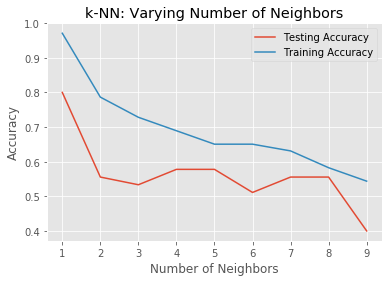

In [152]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


It looks like the test accuracy is highest when using 1, 4, 5, 7 or 8 neighbors. Using 9 neighbors or more seems to result in a simple model that underfits the data. 

In [155]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Calculate Accuracy of our model
print(knn.score(X_test, y_test))

0.8


The Numerical EDA above gave us some very important information, such as the names and data types of the columns, and the dimensions of the DataFrame. 

Now let's get a better understanding of the data by exploring the data visual EDA. scatter_matrix in seaborn.

In [139]:
# Set default matplot style
#plt.style.use('ggplot')

#_ = plt.scatter(x=df_rosters_pirates.Weight, y=df_rosters_pirates.Height, c=df_rosters_pirates.Position)
#plt.xlabel('Weight (lbs)')
#plt.ylabel('Height (Inches)')
#plt.title('Position Weight vs Height')

#plt.show()

#_ = pd.scatter_matrix(df_rosters_pirates)